In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [2]:
df = pd.read_csv("key_attr_players.csv")
df

,Name,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GroupedPosition
0,L. Messi,0,0,81,89,90,94,34,64,84,...,96,20,35,24,6,11,15,14,8,MF
1,K. Benzema,1,1,80,88,83,87,39,78,75,...,90,43,24,18,13,11,5,5,7,FW
2,R. Lewandowski,2,1,75,91,79,86,44,83,71,...,88,35,42,19,15,6,12,8,10,FW
3,K. De Bruyne,2,2,74,88,93,87,64,77,94,...,89,68,65,53,15,13,5,10,13,MF
4,K. Mbappé,2,0,97,89,80,92,36,76,78,...,88,26,34,32,13,5,7,11,6,FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,1,1,68,48,43,51,31,33,40,...,47,39,29,27,6,9,5,13,8,MF
18535,Yang Dejiang,1,1,55,37,41,47,48,39,34,...,45,46,50,52,6,12,11,8,6,MF
18536,L. Mullan,2,1,64,40,49,52,37,35,41,...,59,39,37,48,11,12,8,7,12,MF
18537,D. McCallion,1,1,52,24,25,32,52,41,21,...,41,50,54,54,8,14,13,7,8,DF


In [3]:
attr = ['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
        'PhysicalityTotal', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [4]:
means = df.groupby("GroupedPosition")[attr].mean()
means = means.round(2)

In [5]:
means

,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
GroupedPosition,,,,,,,,,,,
DF,65.54,40.52,53.02,56.83,63.99,68.90,10.40,10.38,10.29,10.33,10.31
FW,71.34,65.27,55.08,65.28,31.49,64.54,10.33,10.31,10.45,10.27,10.33
GK,64.98,62.85,62.00,65.96,35.97,63.22,64.98,62.85,62.00,63.22,65.96
MF,69.62,57.79,62.62,66.89,50.55,61.67,10.26,10.27,10.28,10.34,10.23


In [7]:
p80 = df.groupby("GroupedPosition")[attr].quantile(0.8)
p80

,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
GroupedPosition,,,,,,,,,,,
DF,75.0,51.0,61.0,65.0,70.0,75.0,13.0,13.0,13.0,13.0,13.0
FW,80.0,71.0,63.0,71.0,38.0,73.0,13.0,13.0,13.0,13.0,13.0
GK,71.0,69.0,68.0,73.0,46.0,70.0,71.0,69.0,68.0,70.0,73.0
MF,78.0,66.0,69.0,73.0,64.0,71.0,13.0,13.0,13.0,13.0,13.0


In [9]:
p80.to_csv("Positional Attributes P80.csv")

In [11]:
means.loc["DF"]

PaceTotal           65.54
ShootingTotal       40.52
PassingTotal        53.02
DribblingTotal      56.83
DefendingTotal      63.99
PhysicalityTotal    68.90
GKDiving            10.40
GKHandling          10.38
GKKicking           10.29
GKPositioning       10.33
GKReflexes          10.31
Name: DF, dtype: float64

In [13]:
means.to_csv("Positional Attribute Means.csv")

In [23]:
means.columns

Index(['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
       'DefendingTotal', 'PhysicalityTotal', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

## Radar Chart

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [68]:
def plot_comparison_radar(position, data):
    means = pd.read_csv("Positional Attribute Means.csv",index_col="GroupedPosition")
    if position == "Goalkeeper":
        attr = ['Diving', 'Handling','Kicking','Positioning', 'Reflexes', 'Physicality']
        avg = np.array(means.loc["GK"][['GKDiving', 'GKHandling','GKKicking', 
                                        'GKPositioning', 'GKReflexes','PhysicalityTotal']])
    elif position == "Defender":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling','Defending', 'Physicality']
        avg = np.array(means.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
    elif position == "Midfielder":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling','Defending', 'Physicality']
        avg = np.array(means.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
    elif position == "Attacker (or) Forward":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling','Defending', 'Physicality']
        avg = np.array(means.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
    else:
        avg = None
        
    avg = list(avg)
    avg += avg[:1]
    data += data[:1]
    
    angles1 = [n / 6 * 2 * pi for n in range(6)]
    angles1 += angles1[:1]
    angles2 = [n / 6 * 2 * pi for n in range(6)]
    angles2 += angles2[:1]
    
    ax = plt.subplot(111,polar=True)
    plt.xticks(angles1[:-1],attr)
    
    ax.plot(angles1,avg,label="Positional Average")
    ax.fill(angles1,avg,"teal",alpha=0.1)
    
    ax.plot(angles2,data,label="Your Player")
    ax.fill(angles2,data,"red",alpha=0.1)
    
    plt.legend()
    plt.show()

In [69]:
gks = df[df["GroupedPosition"]=="GK"]

In [70]:
pos = "Goalkeeper"
val = np.array(gks.iloc[0][['GKDiving', 'GKHandling','GKKicking','GKPositioning', 'GKReflexes','PhysicalityTotal']])
print(pos)
print(val)

Goalkeeper
[84 89 75 89 90 89]


ValueError: x and y must have same first dimension, but have shapes (7,) and (6,)

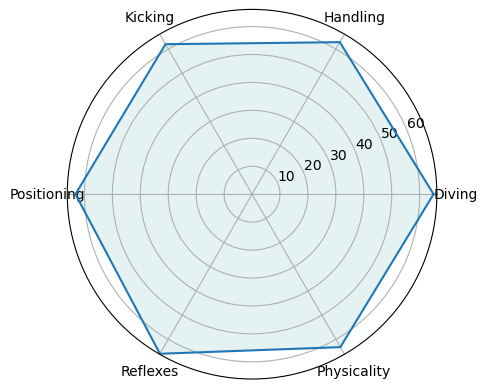

In [71]:
plot_comparison_radar(pos,val)

## Radar Chart - 2

In [74]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [75]:
def plot_comparison_radar(position, data):
    means = pd.read_csv("Positional Attribute Means.csv",index_col="GroupedPosition")
    p80 = pd.read_csv("Positional Attribute P80.csv",index_col="GroupedPosition")
    if position == "Goalkeeper":
        attr = ['Diving', 'Handling','Kicking','Positioning', 'Reflexes', 'Physicality']
        avg = np.array(means.loc["GK"][['GKDiving', 'GKHandling','GKKicking', 
                                        'GKPositioning', 'GKReflexes','PhysicalityTotal']])
        pct80 = np.array(p80.loc["GK"][['GKDiving', 'GKHandling','GKKicking', 
                                        'GKPositioning', 'GKReflexes','PhysicalityTotal']])
    elif position == "Defender":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling','Defending', 'Physicality']
        avg = np.array(means.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
    elif position == "Midfielder":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling','Defending', 'Physicality']
        avg = np.array(means.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
    elif position == "Attacker (or) Forward":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling','Defending', 'Physicality']
        avg = np.array(means.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
    else:
        avg = None
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatterpolar(
        r = list(avg),
        theta = list(attr),
        fill = 'toself',
        name = "Positional Average"
    ))
    
    fig.add_trace(go.Scatterpolar(
        r = list(data),
        theta = list(attr),
        fill = 'toself',
        name = "Your Player"
    ))
    
    fig.update_layout(
        polar = dict(radialaxis = dict(visible=True,range = [0,100])),
        showlegend = True
    )
    
    fig.show()

In [79]:
dfs = df[df["GroupedPosition"]=="DF"]

In [80]:
pos = "Defender"
val = np.array(dfs.iloc[0][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                        'DefendingTotal', 'PhysicalityTotal']])
print(pos)
print(val)

Defender
[81 60 71 72 91 86]


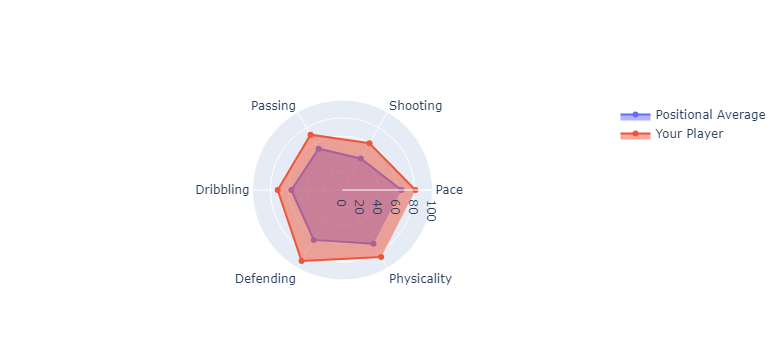

In [81]:
plot_comparison_radar(pos,val)

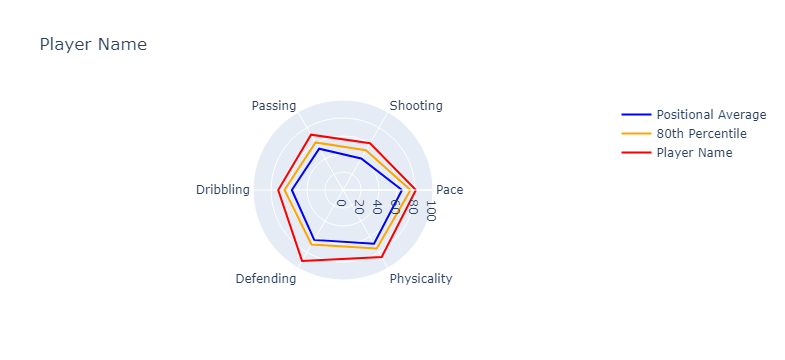

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

def plot_comparison_radar(position, data, player_name):
    means = pd.read_csv("Positional Attribute Means.csv", index_col="GroupedPosition")
    p80 = pd.read_csv("Positional Attributes P80.csv", index_col="GroupedPosition")
    
    if position == "Goalkeeper":
        attr = ['Diving', 'Handling', 'Kicking', 'Positioning', 'Reflexes', 'Physicality']
        avg = np.array(means.loc["GK"][['GKDiving', 'GKHandling', 'GKKicking', 
                                         'GKPositioning', 'GKReflexes', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["GK"][['GKDiving', 'GKHandling', 'GKKicking', 
                                         'GKPositioning', 'GKReflexes', 'PhysicalityTotal']])
    elif position == "Defender":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
        avg = np.array(means.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                         'DefendingTotal', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                         'DefendingTotal', 'PhysicalityTotal']])
    elif position == "Midfielder":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
        avg = np.array(means.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                         'DefendingTotal', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                         'DefendingTotal', 'PhysicalityTotal']])
    elif position == "Attacker (or) Forward":
        attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
        avg = np.array(means.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                         'DefendingTotal', 'PhysicalityTotal']])
        pct80 = np.array(p80.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                         'DefendingTotal', 'PhysicalityTotal']])
    else:
        avg = None
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatterpolar(
        r = list(avg) + [avg[0]],
        theta = attr + [attr[0]],  # Connect back to the first point for a closed radar
        fill = 'none',
        mode = 'lines',
        line_color = 'blue',
        name = "Positional Average"
    ))
    
    fig.add_trace(go.Scatterpolar(
        r = list(pct80) + [pct80[0]],
        theta = attr + [attr[0]],  # Connect back to the first point for a closed radar
        fill = 'none',
        mode = 'lines',
        line_color = 'orange',
        name = "80th Percentile"
    ))
    
    fig.add_trace(go.Scatterpolar(
        r = list(data) + [data[0]],
        theta = attr + [attr[0]],  # Connect back to the first point for a closed radar
        fill = 'none',
        mode = 'lines',
        line_color = 'red',
        name = player_name
    ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 100]),
        ),
        showlegend=True,
        title=player_name,
        plot_bgcolor='white'
    )
    
    fig.show()

# Example usage
plot_comparison_radar("Defender", [81, 60, 71, 72, 91, 86], "Player Name")

In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def plot_comparison_radar(player_data):
    means = pd.read_csv("Positional Attribute Means.csv", index_col="GroupedPosition")
    p80 = pd.read_csv("Positional Attributes P80.csv", index_col="GroupedPosition")
    
    radar_plots = []
    
    for index, row in player_data.iterrows():
        player_name = row['Name']
        position = row['Position']
        player_stats = row.drop(['Name', 'Position']).values.tolist()
        
        if position == "Goalkeeper":
            attr = ['Diving', 'Handling', 'Kicking', 'Positioning', 'Reflexes', 'Physicality']
            avg = np.array(means.loc["GK"][['GKDiving', 'GKHandling', 'GKKicking', 
                                             'GKPositioning', 'GKReflexes', 'PhysicalityTotal']])
            pct80 = np.array(p80.loc["GK"][['GKDiving', 'GKHandling', 'GKKicking', 
                                             'GKPositioning', 'GKReflexes', 'PhysicalityTotal']])
        elif position == "Defender":
            attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
            avg = np.array(means.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
            pct80 = np.array(p80.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
        elif position == "Midfielder":
            attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
            avg = np.array(means.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
            pct80 = np.array(p80.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
        elif position == "Attacker (or) Forward":
            attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
            avg = np.array(means.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
            pct80 = np.array(p80.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
        else:
            avg = None
        
        fig = go.Figure()
        
        fig.add_trace(go.Scatterpolar(
            r = list(pct80) + [pct80[0]],
            theta = attr + [attr[0]],
            fill = 'none',
            fillcolor = "orange",
            mode = 'lines',
            line_color = 'orange',
            name = "80th Percentile"
        ))
        
        fig.add_trace(go.Scatterpolar(
            r = list(player_stats) + [player_stats[0]],
            theta = attr + [attr[0]],
            fill = 'none',
            fillcolor = "blue",
            mode = 'lines',
            line_color = 'blue',
            name = player_name
        ))
        
        fig.update_layout(
            polar=dict(
                radialaxis=dict(visible=True, range=[0, 100]),
            ),
            showlegend=True,
            title=dict(
                text=player_name,
                x=0.5,
                font=dict(size=16)
            ),
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="red"
            ),
            plot_bgcolor='black'
        )
        
        radar_plots.append(fig)
    
    return radar_plots

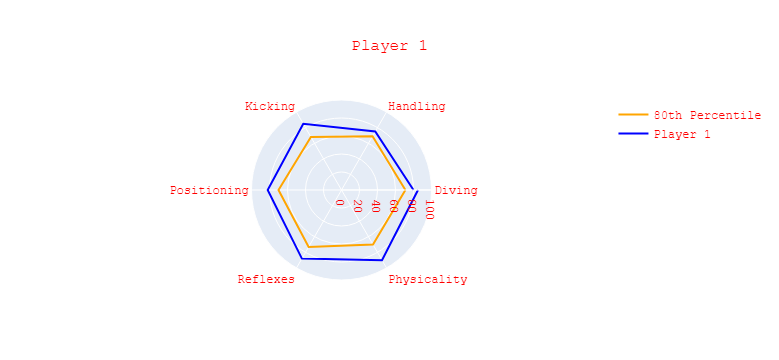

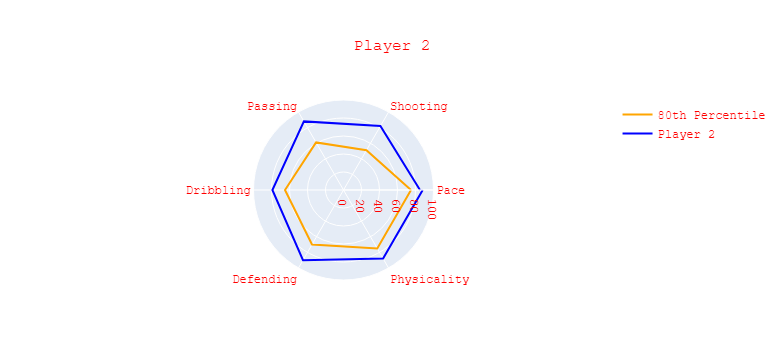

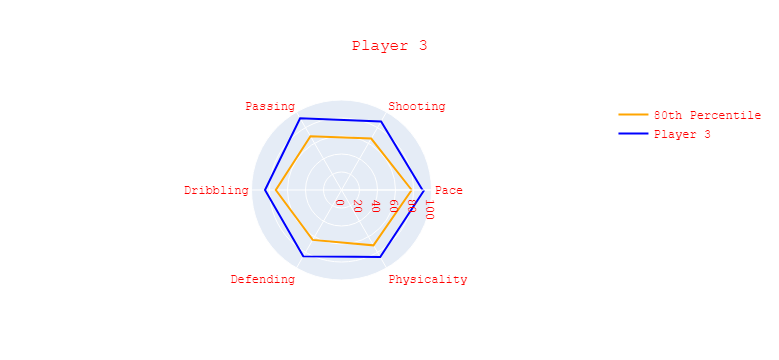

In [24]:
player_data = pd.DataFrame({
'Name': ['Player 1', 'Player 2', 'Player 3'],
    'Position': ['Goalkeeper', 'Defender', 'Midfielder'],
     'PaceTotal': [80, 85, 90],
     'ShootingTotal': [75, 82, 88],
     'PassingTotal': [85, 88, 92],
    'DribblingTotal': [82, 79, 85],
     'DefendingTotal': [88, 90, 85],
     'PhysicalityTotal': [90, 88, 86],
     'GKDiving': [85, 88, 92],
     'GKHandling': [90, 92, 88],
     'GKKicking': [82, 85, 90],
     'GKPositioning': [88, 86, 90],
     'GKReflexes': [85, 88, 92]
 })

radar_plots = plot_comparison_radar(player_data)
for plot in radar_plots:
    plot.show()

In [17]:
def plot_comparison_radar_dataframe(player_data):
    p80 = pd.read_csv("Positional Attributes P80.csv", index_col="GroupedPosition")
    
    radar_plots = []
    
    for index, row in player_data.iterrows():
        player_name = row['Name']
        position = row['Predicted Position']
        
        if position == "Goalkeeper":
            attr = ['Diving', 'Handling', 'Kicking', 'Positioning', 'Reflexes', 'Physicality']
            player_stats = list(player_data[["GK Diving","GK Handling","GK Kicking","GK Positioning",
                                        "GK Reflexes","Total Physicality"]])
            pct80 = np.array(p80.loc["GK"][['GKDiving', 'GKHandling', 'GKKicking', 
                                             'GKPositioning', 'GKReflexes', 'PhysicalityTotal']])
        elif position == "Defender":
            attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
            player_stats = list(player_data[["Total Pace","Total Shooting","Total Passing","Total Dribbling",
                                        "Total Defending","Total Shooting"]])
            pct80 = np.array(p80.loc["DF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
        elif position == "Midfielder":
            attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
            player_stats = list(player_data[["Total Pace","Total Shooting","Total Passing","Total Dribbling",
                                        "Total Defending","Total Shooting"]])
            pct80 = np.array(p80.loc["MF"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
        elif position == "Attacker (or) Forward":
            attr = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
            player_stats = list(player_data[["Total Pace","Total Shooting","Total Passing","Total Dribbling",
                                        "Total Defending","Total Shooting"]])
            pct80 = np.array(p80.loc["FW"][['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
                                             'DefendingTotal', 'PhysicalityTotal']])
        else:
            pct80 = None
        
        fig = go.Figure()
        
        fig.add_trace(go.Scatterpolar(
            r = list(pct80) + [pct80[0]],
            theta = attr + [attr[0]],
            fill = 'none',
            fillcolor = "orange",
            mode = 'lines',
            line_color = 'orange',
            name = "80th Percentile"
        ))
        
        fig.add_trace(go.Scatterpolar(
            r = list(player_stats) + [player_stats[0]],
            theta = attr + [attr[0]],
            fill = 'toself',
            fillcolor = "blue",
            mode = 'lines',
            line_color = 'blue',
            name = player_name
        ))
        
        fig.update_layout(
            polar=dict(
                radialaxis=dict(visible=True, range=[0, 100]),
            ),
            showlegend=True,
            title=dict(
                text=player_name,
                x=0.5,
                font=dict(size=16)
            ),
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="red"
            ),
            plot_bgcolor='black'
        )
        
        radar_plots.append(fig)
    
    return radar_plots